# Objective
Segmentation of customers who use credit cardsuse on the basis of different attributes such as - demographics data, transaction history, transaction behavior (Recency, Frequency, Monetary)

Rapidly identify and evaluate customer behavior signals to optimize marketing activities, etc

# Outcome
Create behavior scoring models

Continuously update customer data

# Business Value
Create foundation for

Personalization strategies to improve customer experience

Targeting different groups in a tailored approach

Recommending core banking products for cross-selling and up-selling, increase sales, revenues, and profits

Deploying customer churn prevention schemes

In [2]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Descriptive analysis 

In [3]:
# Load the dataset
data = pd.read_csv('customer_data.csv')
data.head()

,CustomerID,Age,Gender,AnnualIncome,TransactionCount,TotalSpent,Recency
0,39670,52,Female,114021,50,23517.113529,101
1,24735,61,Female,141411,81,23851.629165,216
2,78761,66,Female,66297,34,31613.032501,329
3,30140,39,Male,31316,15,49052.195039,292
4,61069,23,Female,23079,36,17331.034282,262


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   CustomerID        300000 non-null  int64  
 1   Age               300000 non-null  int64  
 2   Gender            300000 non-null  object 
 3   AnnualIncome      300000 non-null  int64  
 4   TransactionCount  300000 non-null  int64  
 5   TotalSpent        300000 non-null  float64
 6   Recency           300000 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 16.0+ MB


In [5]:
data.describe()

,CustomerID,Age,AnnualIncome,TransactionCount,TotalSpent,Recency
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,56886.224207,48.492397,84929.347627,49.999657,25014.184344,182.405340
std,19076.876863,17.854411,37501.265420,28.544686,14422.437851,105.080106
min,23875.000000,18.000000,20000.000000,1.000000,5.114238,1.000000
25%,40364.000000,33.000000,52410.000000,25.000000,12525.182763,91.000000
50%,56864.500000,49.000000,84936.000000,50.000000,25036.359273,182.000000
75%,73467.000000,64.000000,117351.000000,75.000000,37510.074845,274.000000
max,89901.000000,79.000000,149999.000000,99.000000,49999.718790,364.000000


# 2. Feature Engineering

In [6]:

# 2. Feature Engineering: Calculate RFM (Recency, Frequency, Monetary)
data['Recency'] = data['Recency']  # Already provided in dataset
data['Frequency'] = data['TransactionCount']
data['Monetary'] = data['TotalSpent']



# 3. Prepare features for clustering

In [8]:

# Normalize RFM values for clustering
rfm_features = data[['Recency', 'Frequency', 'Monetary']]
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)
data.head()

,CustomerID,Age,Gender,AnnualIncome,TransactionCount,TotalSpent,Recency,Frequency,Monetary
0,39670,52,Female,114021,50,23517.113529,101,50,23517.113529
1,24735,61,Female,141411,81,23851.629165,216,81,23851.629165
2,78761,66,Female,66297,34,31613.032501,329,34,31613.032501
3,30140,39,Male,31316,15,49052.195039,292,15,49052.195039
4,61069,23,Female,23079,36,17331.034282,262,36,17331.034282


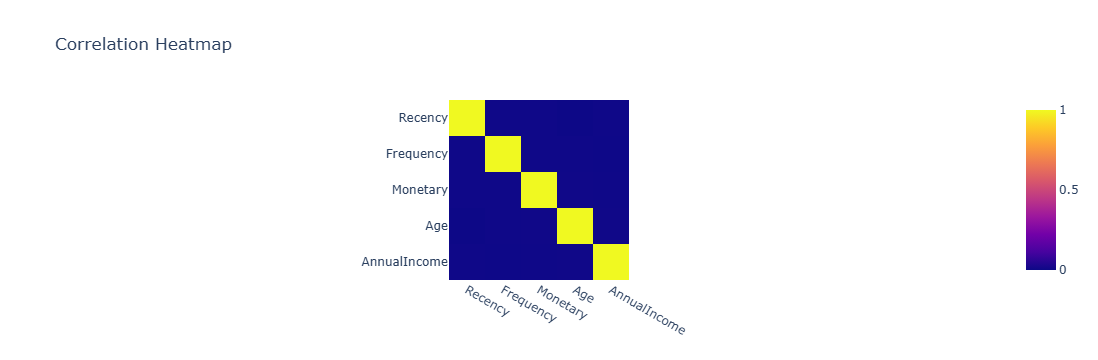

In [26]:
# Now let’s have a look at the correlation in the data:
import plotly.express as px

rfm_features = data[['Recency', 'Frequency', 'Monetary','Age', 'AnnualIncome']]
correlation_fig = px.imshow(rfm_features .corr(), title='Correlation Heatmap')

correlation_fig.show()

# K-Means Clustering

In [9]:

# 4. Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(rfm_scaled)




C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:150: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\Anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 245, in _count_physical_cores
    raise ValueError(


# 5. visualize clusters

# 6. Cluster profile analysis

In [28]:
# 6. Cluster profile analysis
cluster_summary = data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
}).rename(columns={'CustomerID': 'Num_Customers'})

print("\nCluster Summary:")
print(cluster_summary)





Cluster Summary:
         Num_Customers     Recency  Frequency      Monetary
Cluster                                                    
0                52619   96.306087  26.731884  13433.331720
1                66120   84.223306  75.750015  25825.213907
2                65250  189.452307  23.137793  38082.810777
3                50556  269.150843  73.440561  36719.868356
4                65455  276.774486  51.365045  11435.804906


# Cluster Analysis:
# Key Takeaways:
Cluster 1: This is the most valuable cluster with high frequency and monetary value. These are your loyal customers who should be nurtured.

Cluster 2 and Cluster 3: These clusters represent customers with high spending but high recency (haven't bought in a long time). They are valuable but at risk of churn.

Cluster 4: This cluster represents low-value customers in terms of both recency and monetary value. They may need special offers to increase engagement.

Cluster 0: These are moderate spenders with regular transactions, forming a stable customer base.

In [12]:
# Save the clustered dataset
output_file = 'Downloads/customer_segmentation.csv'
data.to_csv(output_file, index=False)
print(f"Segmented customer data saved to '{output_file}'.")


Segmented customer data saved to 'Downloads/customer_segmentation.csv'.
